# 1 Modelling the external data
## Case c) Thermal emission only, free ellipsoidal variation

**Author:** Hannu Parviainen<br>
**Last edited:** 21.11.2021

Here we model the KELT-1 light curves observed with TESS (Beatty20, XX20), LBT (Beatty), and Spitzer (Beatty2019, Beatty2017) using a full phase curve model that includes the transit, secondary eclipse, thermal emission, reflection, ellipsoidal variations and Doppler boosting. 

The model is implemented by `src.priordatalpf.JointLPF`, which inherits all its functionality from `pytransit.lpf.PhaseCurveLPF`.

In this base case we don't constrain the geometric albedo or the planet's day-side flux ratio (we do this in the later cases). These two parameters should be linearly correlated since they are the main parameters affecting the eclipse depth, but it is useful to see their joint posterior.

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from multiprocessing import Pool
from numba import set_num_threads, config
from corner import corner

from src import FinalLPF, read_mcmc

config.THREADING_LAYER = 'safe'
set_num_threads(1)

In [3]:
lpf = FinalLPF('c')

In [4]:
def lnposterior(pv):
    return lpf.lnposterior(pv)

pool = Pool(processes=16)

Global optimisation:   0%|          | 0/1 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/1 [00:00<?, ?it/s]

Run 1/1:   0%|          | 0/50 [00:00<?, ?it/s]

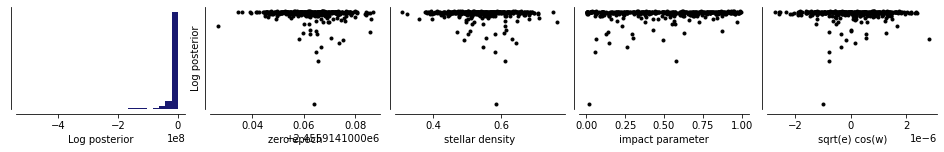

In [5]:
#how_to_start = 'start_from_scratch'
how_to_start = 'continue'

if how_to_start is 'start_from_scratch':
    lpf.optimize_global(45000, 400, pool=pool, lnpost=lnposterior, vectorize=False)
    lpf.sample_mcmc(50, thin=10, repeats=1, save=False, pool=pool, lnpost=lnposterior, vectorize=False)
    
elif how_to_start is 'continue':
    lpf.optimize_global(1, 400, pool=pool, lnpost=lnposterior, vectorize=False)
    df = read_mcmc('results/03c_fin_emission_and_unconstrained_ev.nc')
    sids = permutation(df.values.shape[0])[:lpf.de.n_pop]
    starting_population = df.values[sids, :-1].copy()
    lpf.sample_mcmc(50, thin=10, repeats=1, save=False, population=starting_population, 
                    pool=pool, lnpost=lnposterior, vectorize=False)
    
else:
    raise NotImplementedError

In [6]:
lpf.sample_mcmc(15000, thin=150, repeats=2, save=True, pool=pool, lnpost=lnposterior, vectorize=False)

MCMC sampling:   0%|          | 0/2 [00:00<?, ?it/s]

Run 1/2:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 2/2:   0%|          | 0/15000 [00:00<?, ?it/s]

In [7]:
lpf.sample_mcmc(15000, thin=150, repeats=2, save=True, pool=pool, lnpost=lnposterior, vectorize=False)

MCMC sampling:   0%|          | 0/2 [00:00<?, ?it/s]

Run 1/2:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 2/2:   0%|          | 0/15000 [00:00<?, ?it/s]

In [7]:
lpf.sample_mcmc(15000, thin=150, repeats=6, save=True, pool=pool, lnpost=lnposterior, vectorize=False)

MCMC sampling:   0%|          | 0/6 [00:00<?, ?it/s]

Run 1/6:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 2/6:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 3/6:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 4/6:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 5/6:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 6/6:   0%|          | 0/15000 [00:00<?, ?it/s]

In [8]:
lpf.sample_mcmc(15000, thin=150, repeats=6, save=True, pool=pool, lnpost=lnposterior, vectorize=False)

MCMC sampling:   0%|          | 0/6 [00:00<?, ?it/s]

Run 1/6:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 2/6:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 3/6:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 4/6:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 5/6:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 6/6:   0%|          | 0/15000 [00:00<?, ?it/s]

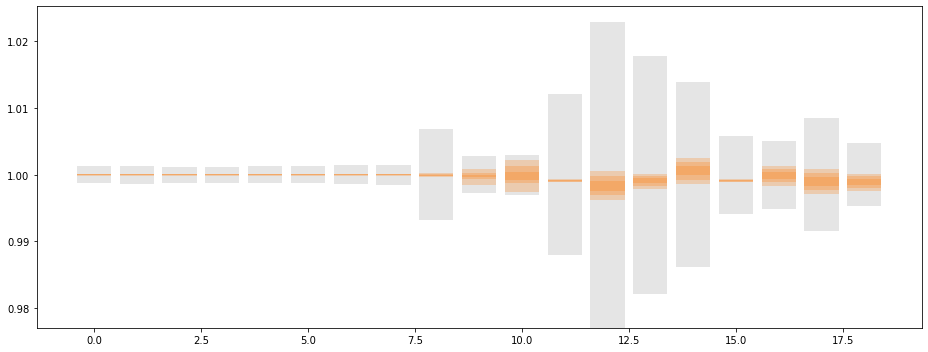

In [8]:
pids = [i for i,n in enumerate(df.columns) if 'lm_i' in n]
fig, ax = subplots(figsize=(13,5))
for i, pid in enumerate(pids):
    pc = percentile(df.iloc[:,pid].values, [50, 16, 84, 2.5, 97.5, 0.15, 99.85])
    p = lpf.ps[pid].prior
    ax.bar(i, 2*p.std, bottom=1-p.std, fc='k', alpha=0.1)
    for j in range(3):
        ax.bar(i, pc[6-2*j]-pc[5-2*j], bottom=pc[5-2*j], fc='C01', alpha=0.25, width=0.8)
    df.iloc[:,pids]
fig.tight_layout()

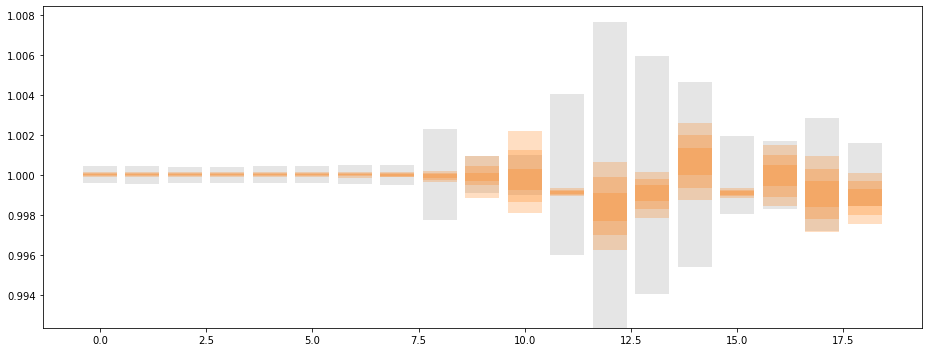

In [8]:
pids = [i for i,n in enumerate(df.columns) if 'lm_i' in n]
fig, ax = subplots(figsize=(13,5))
for i, pid in enumerate(pids):
    pc = percentile(df.iloc[:,pid].values, [50, 16, 84, 2.5, 97.5, 0.15, 99.85])
    p = lpf.ps[pid].prior
    ax.bar(i, 2*p.std, bottom=1-p.std, fc='k', alpha=0.1)
    for j in range(3):
        ax.bar(i, pc[6-2*j]-pc[5-2*j], bottom=pc[5-2*j], fc='C01', alpha=0.25, width=0.8)
    df.iloc[:,pids]
fig.tight_layout()

In [13]:
lpf.ps

[  0 |G| tc             N(μ = 2455914.1628, σ = 0.01)            [    -inf ..      inf],
   1 |G| p              N(μ = 1.217513, σ = 4.5e-05)             [    0.00 ..      inf],
   2 |G| rho            N(μ = 0.5392592032228568, σ = 0.07529312598667542) [    0.00 ..      inf],
   3 |G| b              U(a = 0.0, b = 1.0)                      [    0.00 ..     1.00],
   4 |G| secw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   5 |G| sesw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   6 |P| k2             N(μ = 0.078, σ = 0.005)                  [    0.00 ..      inf],
   7 |G| oev            N(μ = 0.0, σ = 0.09)                     [    -inf ..      inf],
   8 |G| aev_CHEOPS     U(a = 0.0, b = 0.001)                    [    0.00 ..      inf],
   9 |G| adb_CHEOPS     N(μ = 6.3e-05, σ = 6.4e-06)              [    0.00 ..      inf],
  10 |G| ted_CHEOPS     U(a = 0.0, b = 0.5)                      [    -inf ..      inf],
  11 |G| te

In [8]:
df = lpf.posterior_samples(derived_parameters=False)

<AxesSubplot:>

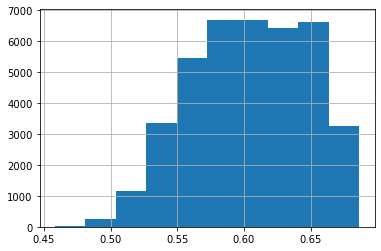

In [9]:
df.rho.hist()

<AxesSubplot:>

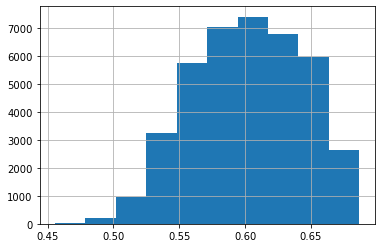

In [12]:
df.rho.hist()

In [18]:
lpf.ps

[  0 |G| tc             N(μ = 2455914.1628, σ = 0.01)            [    -inf ..      inf],
   1 |G| p              N(μ = 1.217513, σ = 4.5e-05)             [    0.00 ..      inf],
   2 |G| rho            N(μ = 0.75, σ = 0.1)                     [    0.00 ..      inf],
   3 |G| b              U(a = 0.0, b = 1.0)                      [    0.00 ..     1.00],
   4 |G| secw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   5 |G| sesw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   6 |P| k2             N(μ = 0.078, σ = 0.005)                  [    0.00 ..      inf],
   7 |G| oev            N(μ = 0.0, σ = 1e-07)                    [    -inf ..      inf],
   8 |G| aev_CHEOPS     U(a = 0.0, b = 0.001)                    [    0.00 ..      inf],
   9 |G| adb_CHEOPS     N(μ = 6.3e-05, σ = 6.4e-06)              [    0.00 ..      inf],
  10 |G| ted_CHEOPS     U(a = 0.0, b = 0.5)                      [    -inf ..      inf],
  11 |G| ten_CHEOPS  

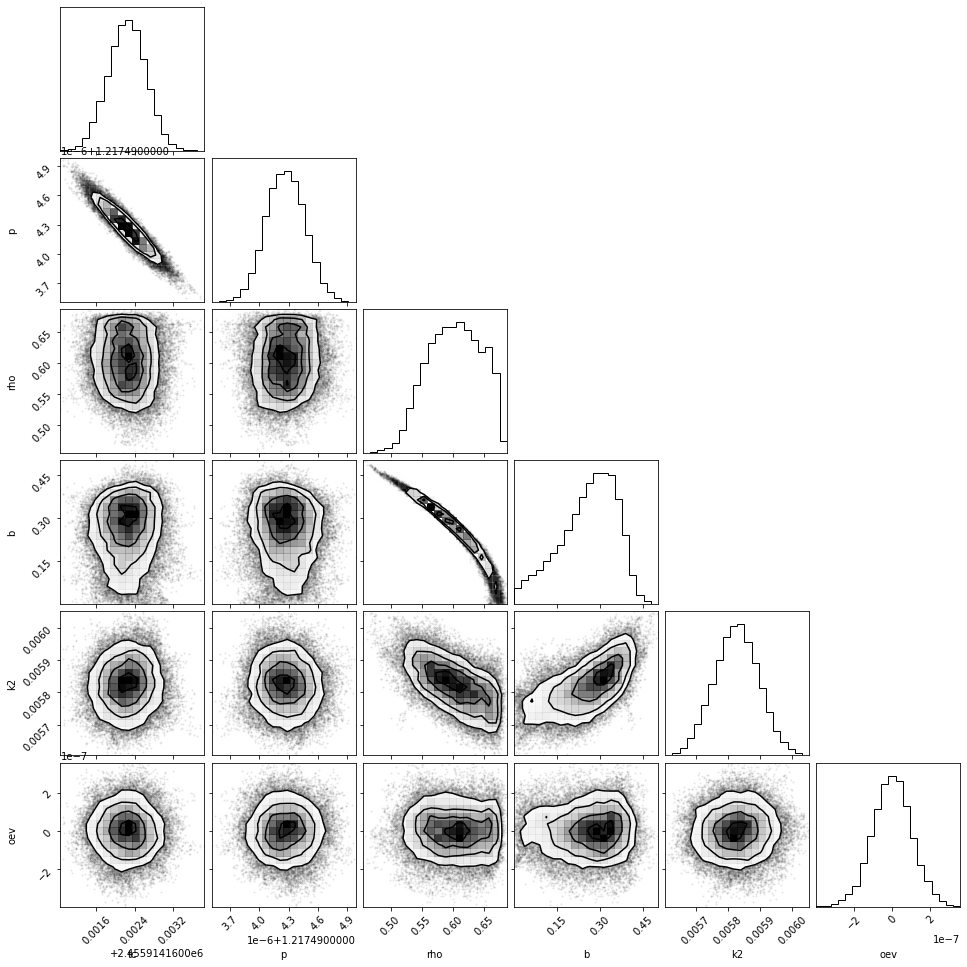

In [11]:
corner(df.iloc[:,[0,1,2,3,6,7]]);

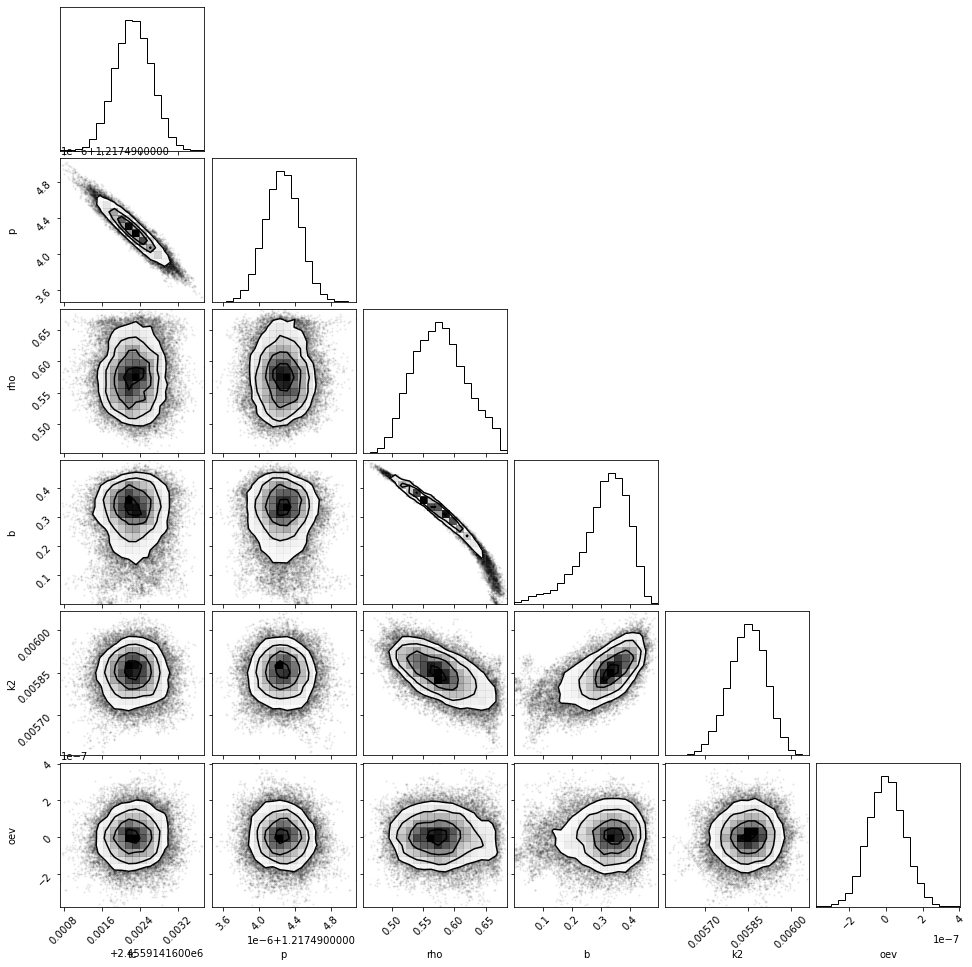

In [15]:
corner(df.iloc[:,[0,1,2,3,6,7]]);

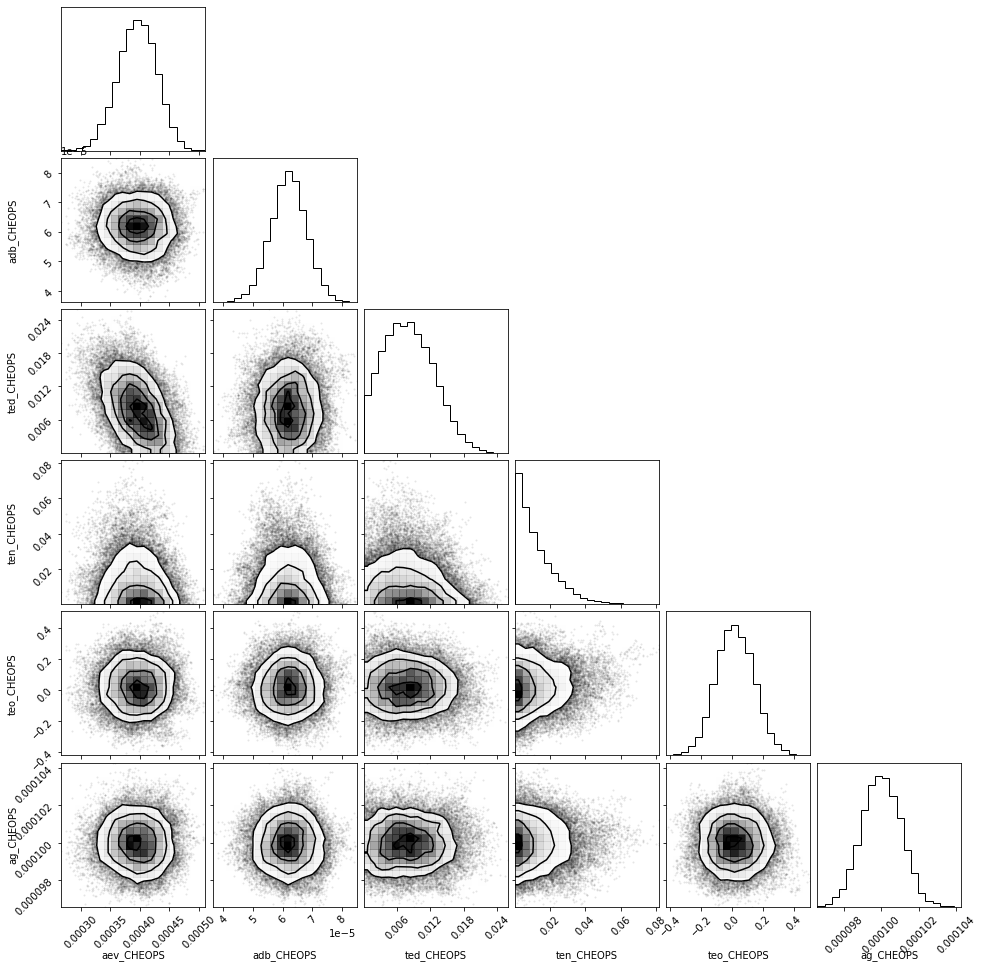

In [13]:
corner(df.iloc[:,8:14]);

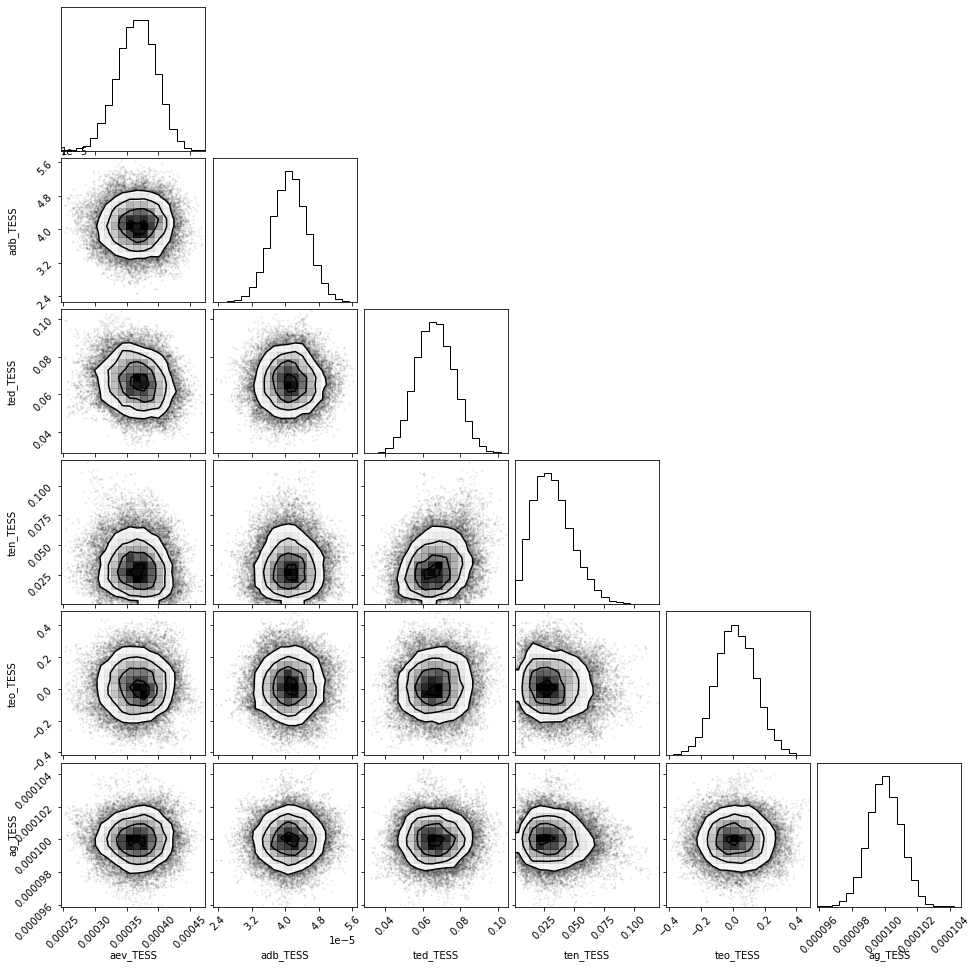

In [14]:
corner(df.iloc[:,14:20]);

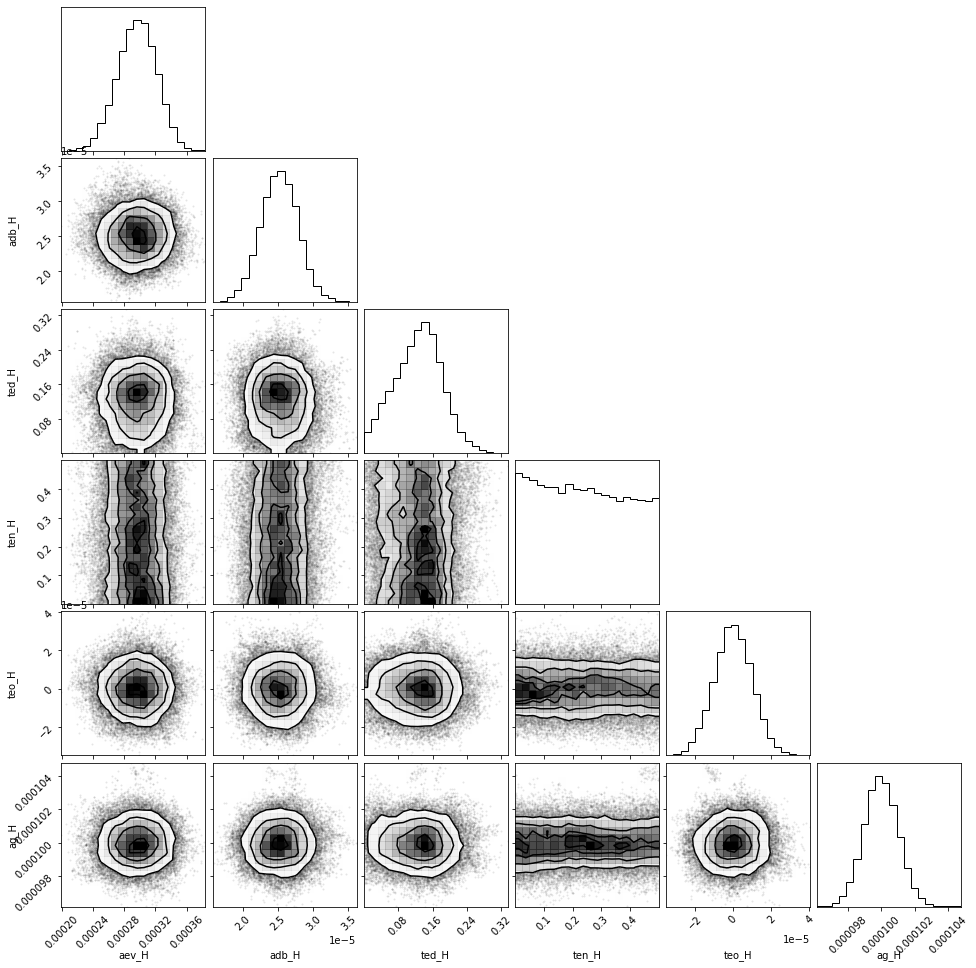

In [15]:
corner(df.iloc[:,20:26]);

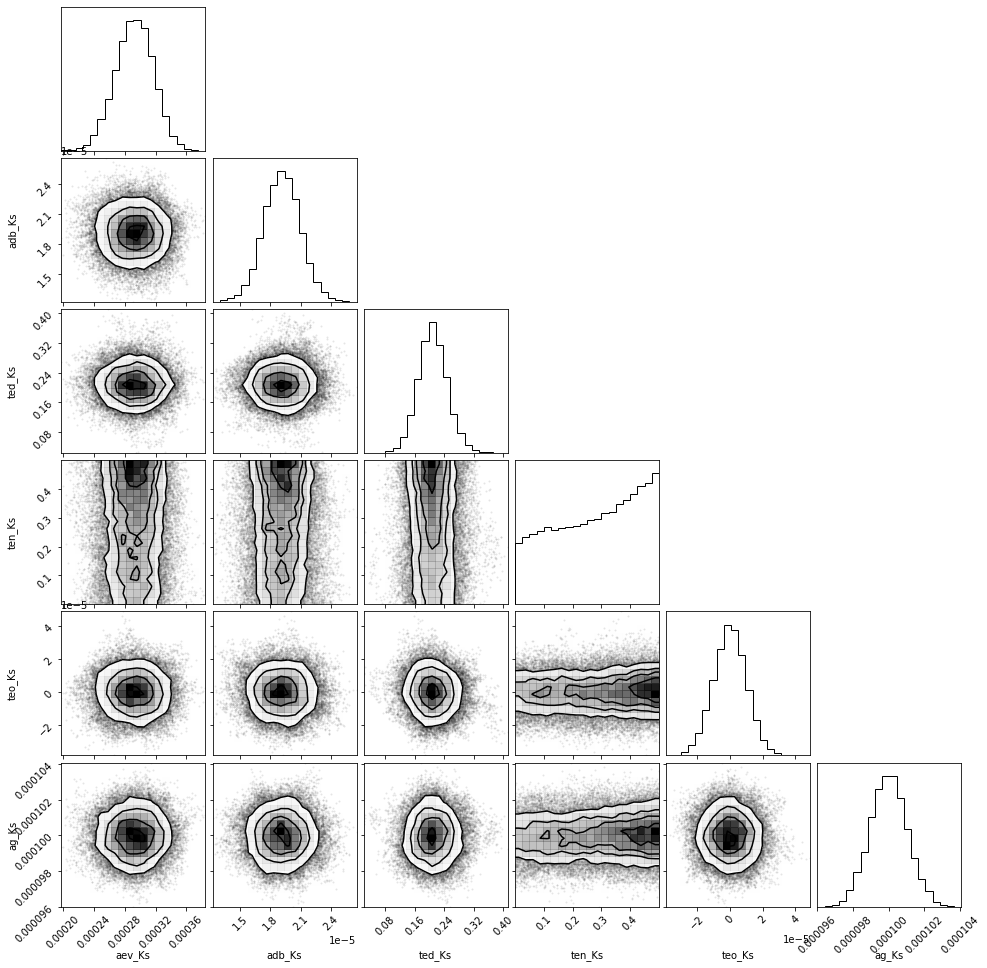

In [16]:
corner(df.iloc[:,26:32]);

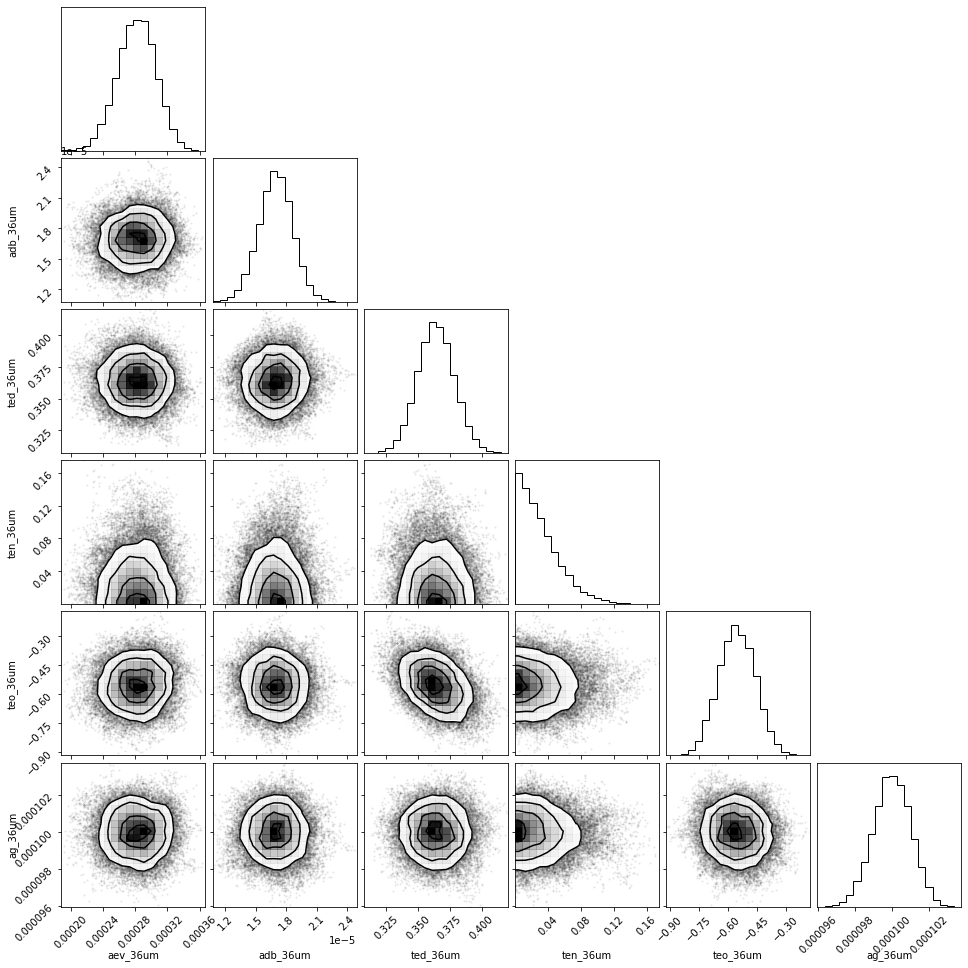

In [17]:
corner(df.iloc[:,32:38]);

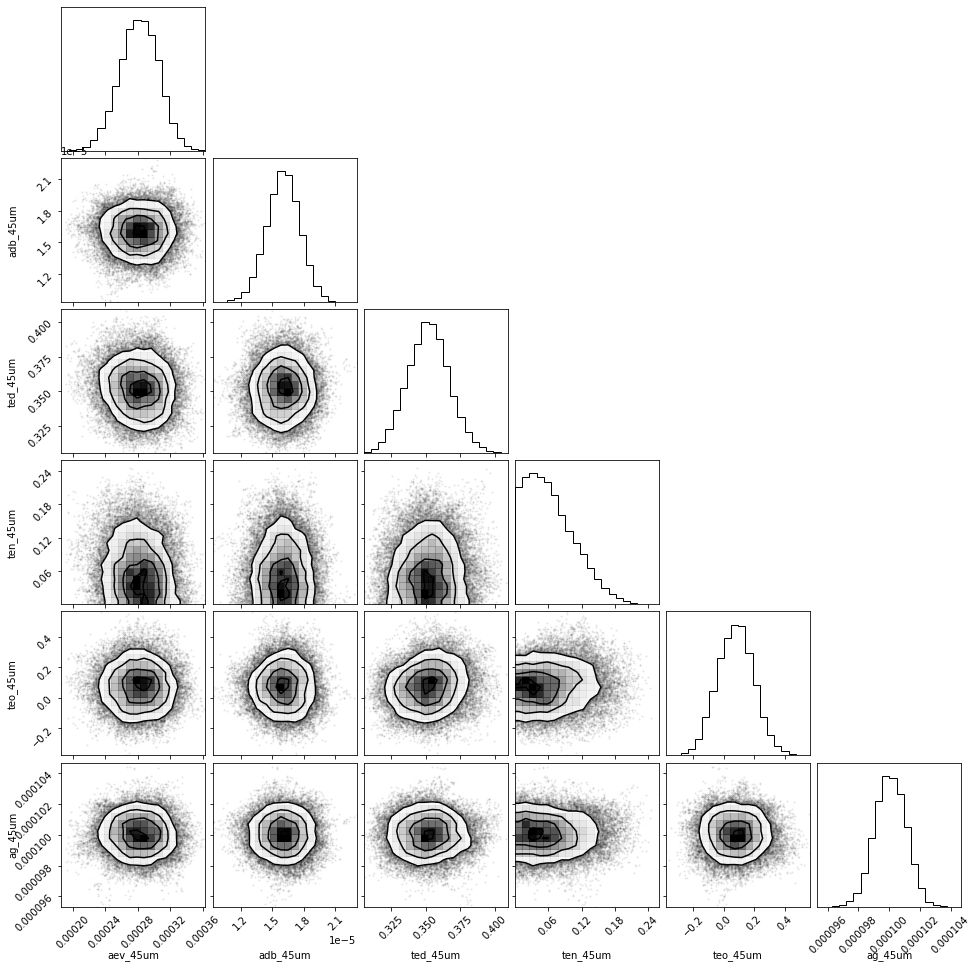

In [18]:
corner(df.iloc[:,38:44]);

---

<center>&copy 2022 Hannu Parviainen</center>